# Forest Fires - Data Analysis

---

### Introduction. 
<p>Fires happen when ignition (from a lightning strike or a careless bonfire, for example) meets available fuel (such as dry vegetation), and warm, dry air fans the flames.
</p>

<p>That’s why the fire season tends to coincide with high temperatures and dry conditions. In the eastern U.S., fire season lasts from March through May, while the West sees most of its fire activity from June through October. </p>


Fires are an important and necessary part of the lifecycle for many different kinds of ecosystems. For as long as forests and grasslands have grown on earth, fires have burned them. In fact, some tree species, like lodgepole pines and aspens, need fire to stimulate their growth.

Fires have also been used by people as a way to manage lands, whether to clear land for farming, get rid of unwanted pests, or to restore nutrients to the soil.


--- 

Here are some more information about forst fires.

- [The Facts About Fire](https://mylandplan.org/content/facts-about-fire)
- [KNIME Applications Forest Fire](https://www.knime.com/knime-applications/forest-fire-prediction)

---

![Forest Fires](https://fee.org/media/38322/forest-fire-3782544_1280.jpg?anchor=center&mode=crop&height=656&widthratio=2.1341463414634146341463414634&rnd=132451547710000000)

---


# Agenda for this Notebook

- In this notebook, We are doing some analysis for the Forest Fire (Montesinho park fire) using below steps.

1.   Load Dataset
2.   Data Preparation & cleaning
3.   Exploratory Analysis & Visualization
4.   Intresting questions and answer about the data
5.   Summarize & Conclusion





- Let's install and upgrade some neccessary packages.

In [1]:
# Install Necessary Packages, (First Time Only)

# !pip install numpy --upgrade
# !pip install pandas --upgrade
# !pip install matplotlib --upgrade
# !pip install seaborn --upgrade



In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

# Load Dataset


Firstly, We need to check the file for dataset using `os` package and print the filesname on the current directory

In [3]:
os.listdir('../input/forest-firearea-datasets')

['forestfires.csv']

In [4]:
# Reading csv file

forest_df = pd.read_csv('../input/forest-firearea-datasets/forestfires.csv', delimiter=',',  )


## Attribute Informations


  1. `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9
  2. `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9
  3. `month` - month of the year: "jan" to "dec" 
  4. `day` - day of the week: "mon" to "sun"
  5. `FFMC` - FFMC index from the FWI system: 18.7 to 96.20
  6. `DMC` - DMC index from the FWI system: 1.1 to 291.3 
  7. `DC` - DC index from the FWI system: 7.9 to 860.6 
  8. `ISI` - ISI index from the FWI system: 0.0 to 56.10
  9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
  10. `RH` - relative humidity in %: 15.0 to 100
  11. `wind` - wind speed in km/h: 0.40 to 9.40 
  12. `rain` - outside rain in mm/m2 : 0.0 to 6.4 
  13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). 



In [5]:
#  Display the first few rows

forest_df.head(20)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


- To know how many rows and columns, we use `shape` attribute

In [6]:
forest_df.shape

(517, 13)

- After we successfully loading the dataset here, We extract the feature name from the dataset using `columns` attrubute

In [7]:
feature_names = forest_df.columns

feature_names

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

Here,  we can see the data type of `feature_names` variable. It's shows the `object` type of list


## Data Preparation and Cleaning

In this section, We'll prepare the data and filter data.

- Let's check the data information, to know how many missing values available in the dataset

In [8]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB



- As we can see, There are `13` total columns and `517` rows are there, Also there are 3 type of datatypes available `int64`, `float64` and `object`. Insort, 8 feature are `float64`, 3 feature are `int64` and 2 feature are `object` type of data


- The second column is represents the number of not-null type of data. It means there are no any missing values in the dataset.

### Saperate the numerical and categorical feature names.

- For that we have describe method using parameter

In [9]:
# Display the object type of data information.

forest_df.describe(include=['O'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [10]:
# Lets create an variable and store its column name

categorical_feature = forest_df.describe(include=['O']).columns

# Print it in list type ...
print(list(categorical_feature))

['month', 'day']


###  Q: How many total number of values in `month` and `day` feature?

In [11]:
forest_df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
forest_df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

### Using same method let's get numerical feature from dataset

- Now we are use `int` and `float` instead of `O` (object) to get all integer and float type of feature

In [13]:
forest_df.describe(include=["int", "float"])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### In this table, We can clearly seen that what are the `min`, `median`, `std`, `max` and `25%`, `50%`, `75%` values.

In [14]:
numerical_feature = forest_df.describe(include=["int", "float"]).columns

# Print it in list type ..
print(list(numerical_feature))

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


- Create new column for area in kilometers. and convert hector to kilometer


In [15]:
forest_df['area_km'] = forest_df['area'] / 100

forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


## Exploratory Analysis and Visualization

In this section, We are doing the analysis of the data using pandas method and visualization the graphs using matplotlib and seaborn package,

### Q: What is the Highest Fire In KM?

In [16]:
# Shows the highes area in km

forest_df.sort_values(by="area_km", ascending=False).head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,10.9084
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,7.4628
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,2.7853
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,2.1288
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,2.0094


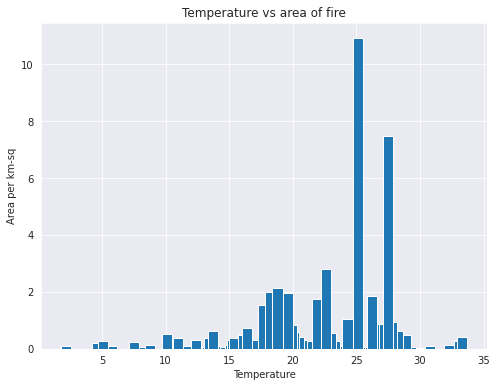

In [17]:
highest_fire_area = forest_df.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(8, 6))

plt.title("Temperature vs area of fire" )
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'])

plt.xlabel("Temperature")
plt.ylabel("Area per km-sq")
plt.show()

#### Observation:

- Here, We can see that the highest fire around the area in kilometers and the temperature. Around 25 to 30 temperature the heightst km per area fire occurs.

#### Show the number of categorial values using graphs



Index(['month', 'day'], dtype='object')


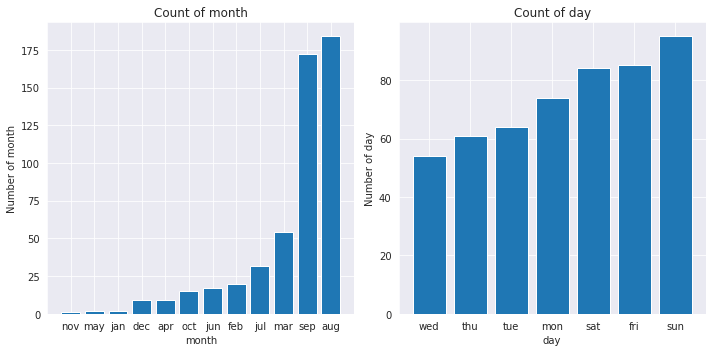

In [18]:
print(categorical_feature)


plt.figure(figsize=(10, 5))
for idx, column in enumerate(categorical_feature):
    df = forest_df.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 2, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)
    
plt.tight_layout()
plt.show()     

In [19]:
len(numerical_feature)

# forest_df[numerical_feature]
forest_df[categorical_feature]

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun
...,...,...
512,aug,sun
513,aug,sun
514,aug,sun
515,aug,sat


### PairPloat Relation

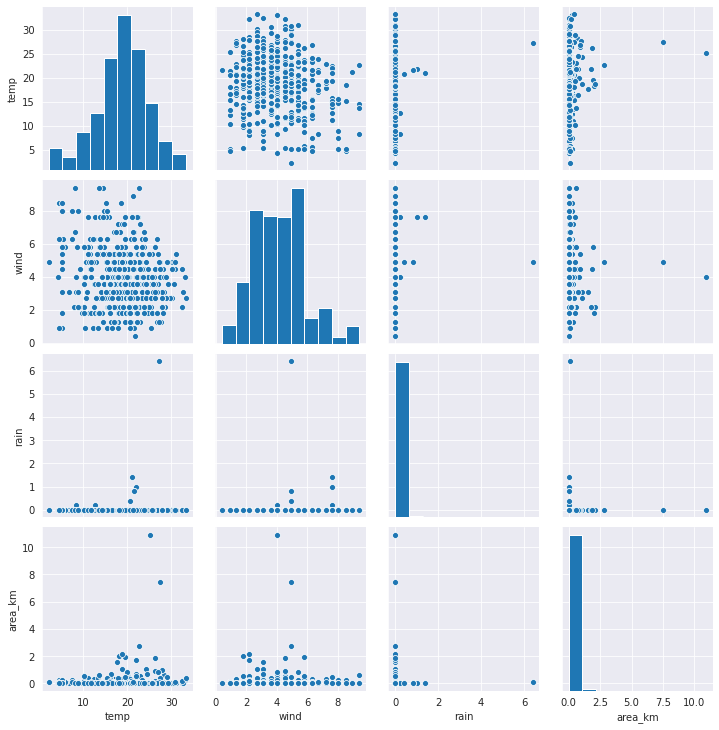

In [20]:
sns.set_style('darkgrid')
# Find the relation
# plt.subplot(forest_df)

sns.pairplot(forest_df[["temp", "wind", "rain", "area_km"]])
plt.show()


### Box Plot Outliers

- Show the min, max, median, mean and outliers in this boxplots

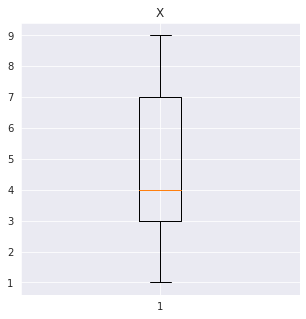

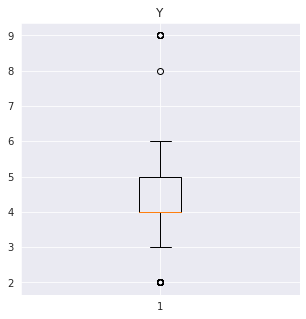

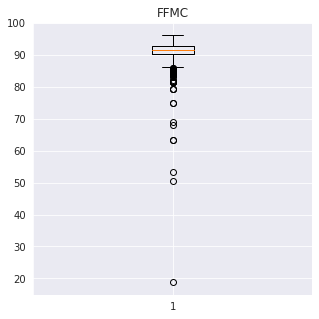

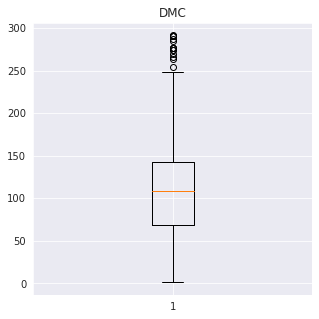

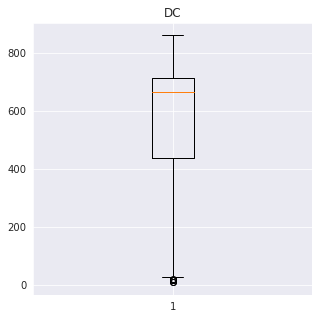

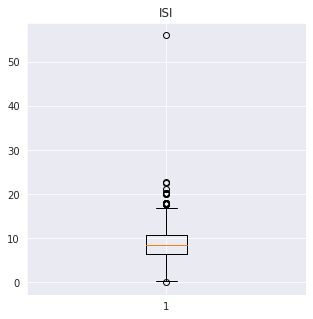

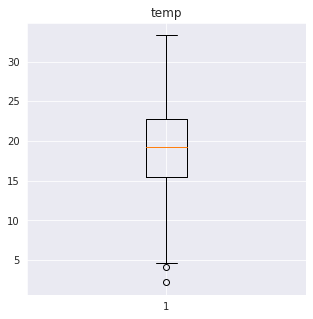

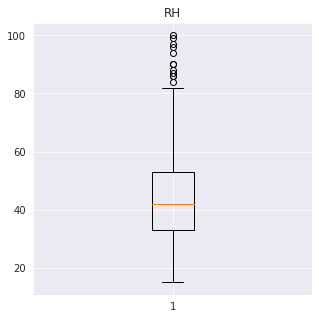

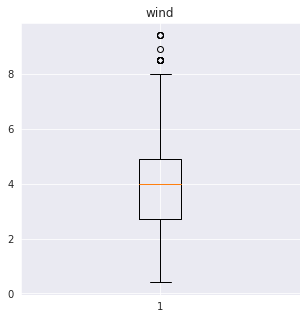

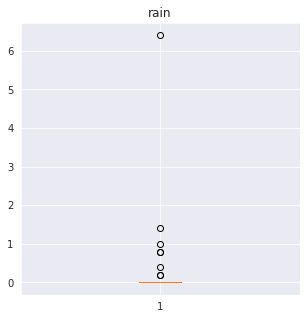

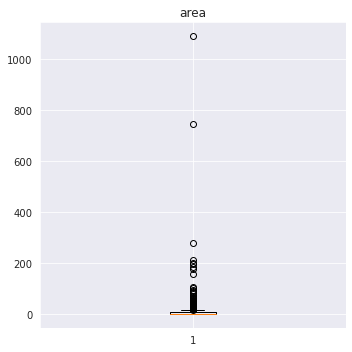

In [21]:
for idx, col  in enumerate(numerical_feature, 1):
    plt.figure(figsize=(5,5))
    
#     plt.subplot(len(numerical_feature) // 2, 3, idx)
    plt.boxplot(forest_df[col])

    plt.title(col)
#     plt.hist(forest_df[col])

plt.tight_layout()
plt.show(plt)

### HeatMap

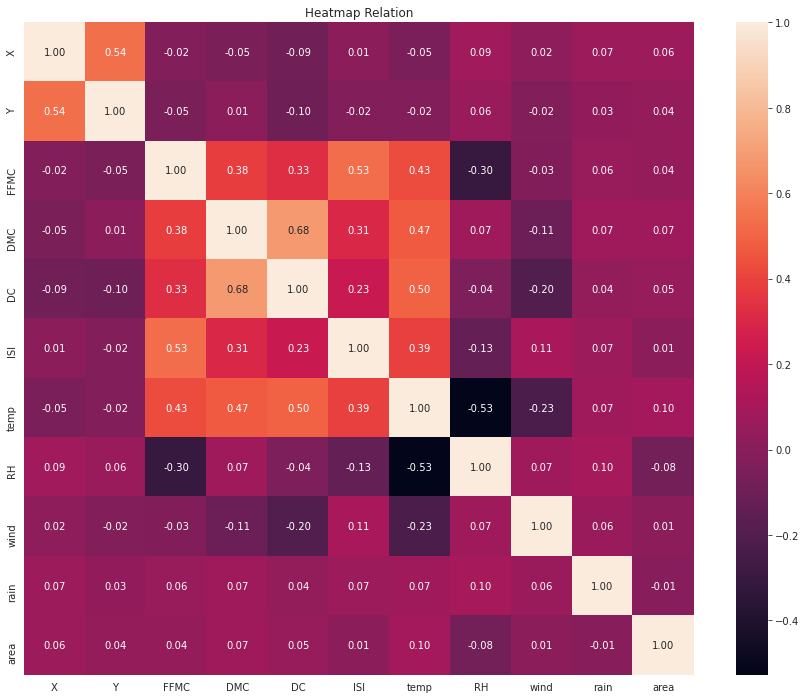

In [22]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(forest_df[numerical_feature].corr(), annot=True, fmt='.2f');


##### As we can see in this heatmap, The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.

In [23]:
forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


#### Asking and Answering Questions



## Q: What is the month wise area per sq km flow count?

## Q: What is the X and Y values in compare to area per sq. km wise ?

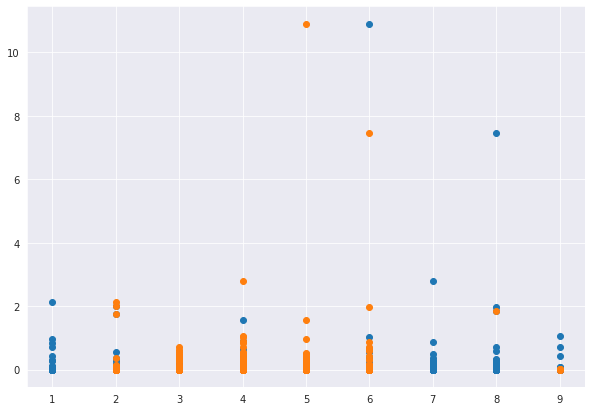

In [24]:
plt.figure(figsize=(10, 7))

plt.scatter(forest_df['X'], forest_df['area_km'])
plt.scatter(forest_df['Y'], forest_df['area_km'])


plt.show()

## Q: What is the highest rain and give the month and days.

In [25]:

highest_rain = forest_df.sort_values(by='rain', ascending=False)[['month', 'day', 'rain']].head()
highest_rain


,month,day,rain
499,aug,tue,6.4
509,aug,fri,1.4
243,aug,sun,1.0
500,aug,tue,0.8
501,aug,tue,0.8


###### In this dataframe, Mostly highest rain fall in the Auguest Month.

## Q: Give the highest and lowest temperature in month and day wise.

In [26]:
highest_temp = forest_df.sort_values(by='temp', ascending=False)[['month', 'day', 'temp']].head()

lowest_temp =  forest_df.sort_values(by='temp', ascending=True)[['month', 'day', 'temp']].head()

print("Highest Temperature")

print(highest_temp)

print()

print()

print("Lowest Temperature")
print(lowest_temp)


Highest Temperature
    month  day  temp
498   aug  tue  33.3
484   aug  sun  33.1
496   aug  mon  32.6
492   aug  fri  32.4
491   aug  thu  32.4


Lowest Temperature
    month  day  temp
280   dec  fri   2.2
282   feb  sun   4.2
279   dec  mon   4.6
278   dec  mon   4.6
277   dec  mon   4.6


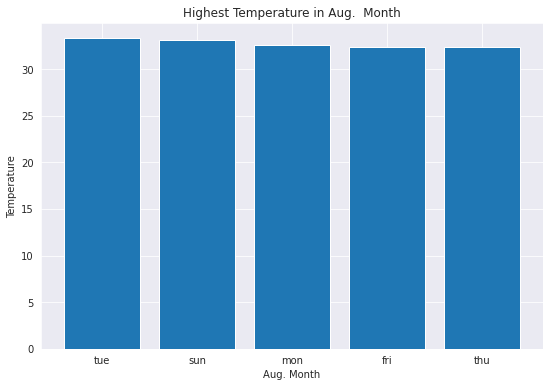

In [27]:
plt.figure(figsize=(9, 6))

plt.title("Highest Temperature in Aug.  Month")

plt.bar(highest_temp['day'], highest_temp['temp'])

plt.xlabel("Day")
plt.xlabel("Aug. Month")


plt.ylabel("Temperature")
plt.show()

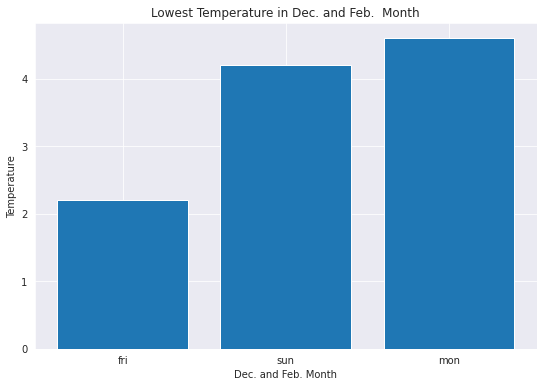

In [28]:
plt.figure(figsize=(9, 6))

plt.title("Lowest Temperature in Dec. and Feb.  Month")

plt.bar(lowest_temp['day'], lowest_temp['temp'])

plt.xlabel("Day")
plt.xlabel("Dec. and Feb. Month")

plt.ylabel("Temperature")

plt.show()

In [29]:
forest_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_km
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.0000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.0000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.0000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.0000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.0644
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0.5429
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0.1116
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.0000


## Inferences and Conclusion


- Using Matplotlib and Seaborn, We can analysis in depth using diffrent kind of datasets. In this project we had seen the area wise forest fire and diffret kind of temperature and rainning falls. Also we can more analysis the other features too. Using diffrent kind of visual graphs. Such as, Group, CateGraph, Distribution Plots, Statastical Plots, PaiChart, Violine Plots and many more.


## References and Future Work


### Regerence Links

<!-- [NumPy] (https://numpy.org/doc/stable/index.html) -->

<!-- [Pandas Package] (https://pandas.pydata.org/) -->

<!-- [Matplotlob] (https://matplotlib.org/) -->

[MatPlotLib Gallary] (https://matplotlib.org/gallery.html)

[Seaborn] (https://seaborn.pydata.org/)

[Seaborn Gallary] (https://seaborn.pydata.org/examples/index.html)

<!-- [Data Analysis with Python: Zero to Pandas] (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas) -->

<!-- [Numerical Computing with Numpy] (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-3-numerical-computing-with-numpy) -->

<!-- [Analyzing Tabular Data with Pandas] (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-4-analyzing-tabular-data-with-pandas) -->

<!-- [Visualization with Matplotlib and Seaborn] (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn) -->

<!-- [Exploratory Data Analysis - A Case Study] (https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-6-exploratory-data-analysis-a-case-study) -->


---

### Future Work

<h4 class='text-info'>Doing some more visualization and analysis using this dataset and implement some machine learning model in it.
</h4>

---



<h3 class='text-success' >I hope you enjoy in this kernel and give Upvote it. 👍</h3>

--- 
---

<div class="text-center ">
    <h1 class='text-primary bg-info'>That's it Guys,</h1>
    <h1>🙏</h1>
    
        
        I Hope you guys you like and enjoy it, and learn something interesting things from this notebook, 
        
        Even I learn a lots of things while I'm creating this notebook
    
        Keep Learning,
        Regards,
        Vikas Ukani.
    
</div>

---
---

<img src="https://static.wixstatic.com/media/3592ed_5453a1ea302b4c4588413007ac4fcb93~mv2.gif" align="center" alt="Thank You"  width="90%" />

